In [35]:
import scipy
# numpy
import numpy as np
# matplotlib'
import matplotlib
import matplotlib.pyplot as plt
# pandas
import pandas as pd
# scikit-learn
import sklearn
import statsmodels
%matplotlib inline

In [36]:
df = pd.read_csv('champagne.csv', header=0)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [37]:
split_point = len(df) - 12
dataset, validation = df.loc[0:split_point], df.loc[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv',index=False)
validation.to_csv('validation.csv',index=False)

Dataset 94, Validation 12


In [38]:
dataset.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [5]:
validation.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
93,1971-10,6981
94,1971-11,9851
95,1971-12,12670
96,1972-01,4348
97,1972-02,3564


# Model Evaluation
Model evaluation will only be performed on the data in dataset.csv prepared in the previous section.

Model evaluation involves two elements:

Performance Measure.
Test Strategy.

#### Performance Measure

The observations are a count of champagne sales in millions of units.

We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data.

Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.

We can calculate the RMSE using the helper function from the scikit-learn library mean_squared_error() that calculates the mean squared error between a list of expected values (the test set) and the list of predictions. We can then take the square root of this value to give us an RMSE score.



#### Test Strategy
Candidate models will be evaluated using walk-forward validation.

This is because a rolling-forecast type model is required from the problem definition. This is where one-step forecasts are needed given all available data.

The walk-forward validation will work as follows:

The first 50% of the dataset will be held back to train the model.

The remaining 50% of the dataset will be iterated and test the model.

For each step in the test dataset:
    
A model will be trained.

A one-step prediction made and the prediction stored for later evaluation.

The actual observation from the test dataset will be added to the training dataset for the next iteration.

The predictions made during the iteration of the test dataset will be evaluated and an RMSE score reported.

Firstly, we can split the dataset into train and test sets directly. We’re careful to always convert a loaded dataset to float32 in case the loaded data still has some String or Integer data types.

In [39]:
# prepare data
X = dataset['Perrin Freres monthly champagne sales millions ?64-?72'].values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [40]:
train

array([ 2815.,  2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,
        2922.,  4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,
        3776.,  3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,
        3113.,  3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,
        3528.,  5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,
        4520.,  4539.,  3663.,  1643.,  4739.,  5428.,  8314.], dtype=float32)

# Persistence

The baseline prediction for time series forecasting is called the naive forecast, or persistence.

This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

In [41]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2899.000, Expected=3370
>Predicted=3

#### Running the test harness prints the prediction and observation for each iteration of the test dataset.

The example ends by printing the RMSE for the model.

In this case, we can see that the persistence model achieved an RMSE of 3167.362. This means that on average, the model was wrong by about 3,167 million sales for each prediction made.

# Data Analysis
We can use summary statistics and plots of the data to quickly learn more about the structure of the prediction problem.

In this section, we will look at the data from five perspectives:

Summary Statistics.
Line Plot.
Seasonal Line Plots
Density Plots.
Box and Whisker Plot.

In [42]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [43]:
from pandas import datetime

def parser(x):
    return pd.datetime.strptime(x, '%Y-%m')

In [44]:
df['Month'] = df['Month'].apply(lambda x : parser(x))

In [45]:
df.dtypes

Month                                                     datetime64[ns]
Perrin Freres monthly champagne sales millions ?64-?72             int64
dtype: object

In [46]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [47]:
df = df.set_index(df['Month'])

In [48]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
Month,,
1964-01-01,1964-01-01,2815
1964-02-01,1964-02-01,2672
1964-03-01,1964-03-01,2755
1964-04-01,1964-04-01,2721
1964-05-01,1964-05-01,2946


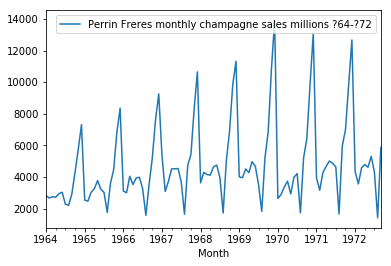

In [49]:
df.plot()

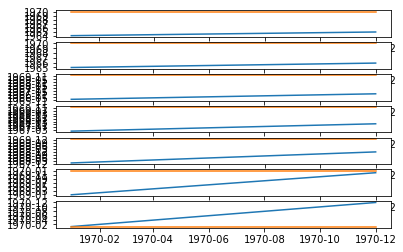

In [58]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
#series = Series.from_csv('dataset.csv')
groups = df['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

In [50]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [52]:
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = dataset.index[months_in_year:]

In [53]:
stationary

12    -274.0
13    -197.0
14     276.0
15     545.0
16     830.0
17     194.0
18     746.0
19    -453.0
20     673.0
21     173.0
22    1074.0
23    1045.0
24     572.0
25     531.0
26    1016.0
27     257.0
28     161.0
29     756.0
30     232.0
31    -186.0
32     -67.0
33     737.0
34     776.0
35     897.0
36    2262.0
37      82.0
38    -329.0
39     991.0
40     583.0
41     553.0
       ...  
64     321.0
65     -76.0
66    -442.0
67      98.0
68     174.0
69     -50.0
70     945.0
71    2585.0
72   -1377.0
73   -1058.0
74   -1140.0
75    -536.0
76   -2041.0
77    -691.0
78     694.0
79     -83.0
80      -1.0
81    -448.0
82    -961.0
83    -840.0
84    1295.0
85     263.0
86     916.0
87     936.0
88    2083.0
89     888.0
90     416.0
91     -79.0
92     730.0
93     557.0
Length: 82, dtype: float64

same as above function 

In [54]:
stationary = dataset['Perrin Freres monthly champagne sales millions ?64-?72'] - dataset['Perrin Freres monthly champagne sales millions ?64-?72'].shift(12)

In [55]:
stationary

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    -274.0
13    -197.0
14     276.0
15     545.0
16     830.0
17     194.0
18     746.0
19    -453.0
20     673.0
21     173.0
22    1074.0
23    1045.0
24     572.0
25     531.0
26    1016.0
27     257.0
28     161.0
29     756.0
       ...  
64     321.0
65     -76.0
66    -442.0
67      98.0
68     174.0
69     -50.0
70     945.0
71    2585.0
72   -1377.0
73   -1058.0
74   -1140.0
75    -536.0
76   -2041.0
77    -691.0
78     694.0
79     -83.0
80      -1.0
81    -448.0
82    -961.0
83    -840.0
84    1295.0
85     263.0
86     916.0
87     936.0
88    2083.0
89     888.0
90     416.0
91     -79.0
92     730.0
93     557.0
Name: Perrin Freres monthly champagne sales millions ?64-?72, Length: 94, dtype: float64

In [57]:
# check if stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(stationary.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.180580
p-value: 0.000000
Critical Values:
	1%: -3.514
	10%: -2.586
	5%: -2.898


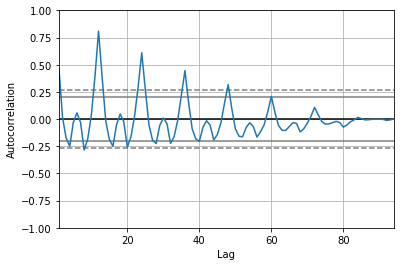

In [58]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(dataset['Perrin Freres monthly champagne sales millions ?64-?72'])

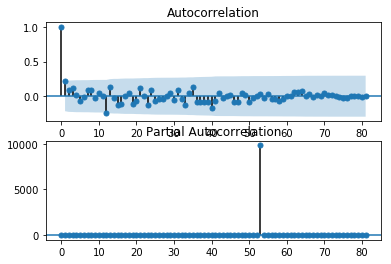

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(stationary.dropna(), ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(stationary.dropna(), ax=pyplot.gca())
pyplot.show()

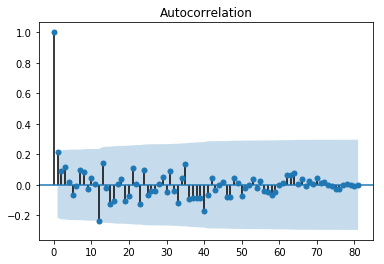

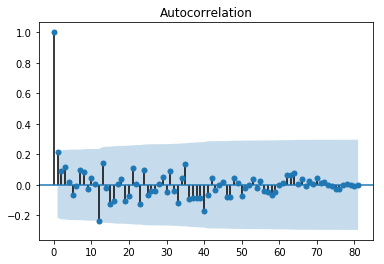

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(stationary.dropna())


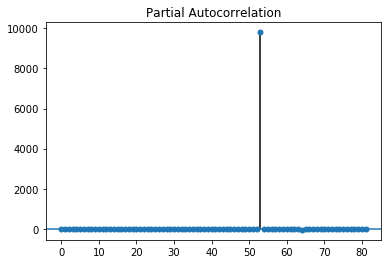

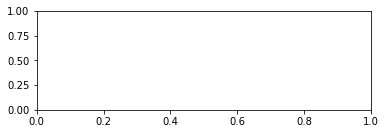

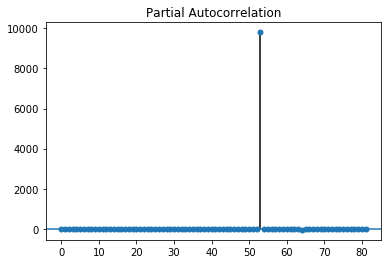

In [61]:
pyplot.subplot(212)
plot_pacf(stationary.dropna())


In [62]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [63]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	
	X = X.astype('float32')
	#print(X)
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc',disp=0)
		#print(model_fit.summary())
		yhat = model_fit.forecast()[0]
		#print(yhat)       
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

In [64]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				#print('order',order)
				try:
					mse = evaluate_arima_model(dataset, order)
					#print(mse)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [66]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# evaluate parameters

series = Series.from_csv('dataset.csv', header=0)
series.dropna(inplace=True)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')
# load dataset
series = Series.from_csv('dataset.csv')
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
#evaluate_models(df['Perrin Freres monthly champagne sales millions ?64-?72'].values, p_values, d_values, q_values)
evaluate_models(series.values, p_values, d_values, q_values)

Dataset 69, Validation 12
ARIMA(0, 0, 1) RMSE=814.032
ARIMA(0, 0, 2) RMSE=858.796
ARIMA(0, 0, 3) RMSE=830.621
ARIMA(0, 0, 4) RMSE=850.470
ARIMA(0, 1, 1) RMSE=749.526
ARIMA(0, 2, 1) RMSE=1015.061
ARIMA(1, 0, 0) RMSE=833.687
ARIMA(1, 1, 0) RMSE=918.964
ARIMA(1, 1, 1) RMSE=761.824
ARIMA(1, 2, 0) RMSE=1426.064
ARIMA(2, 0, 0) RMSE=834.047
ARIMA(2, 1, 0) RMSE=824.423
ARIMA(2, 1, 1) RMSE=776.818
ARIMA(2, 2, 0) RMSE=1121.154
ARIMA(2, 2, 1) RMSE=844.848
ARIMA(3, 0, 0) RMSE=796.342
ARIMA(3, 1, 0) RMSE=843.049
ARIMA(3, 2, 0) RMSE=1088.919
ARIMA(4, 0, 0) RMSE=815.481
ARIMA(4, 1, 0) RMSE=838.049
ARIMA(4, 1, 1) RMSE=796.641
ARIMA(4, 2, 0) RMSE=1035.700
ARIMA(4, 2, 1) RMSE=867.484
ARIMA(5, 0, 0) RMSE=815.977
ARIMA(5, 1, 0) RMSE=841.310
ARIMA(6, 0, 0) RMSE=818.350
ARIMA(6, 1, 0) RMSE=842.685
Best ARIMA(0, 1, 1) RMSE=749.526


In [14]:
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
evaluate_models(df['Perrin Freres monthly champagne sales millions ?64-?72'].values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=785.401
ARIMA(0, 1, 1) RMSE=842.240
ARIMA(1, 0, 0) RMSE=781.498
ARIMA(1, 1, 0) RMSE=897.585
ARIMA(1, 1, 1) RMSE=840.265
Best ARIMA(1, 0, 0) RMSE=781.498


# Review Residual Errors

A good final check of a model is to review residual forecast errors.

Ideally, the distribution of residual errors should be a Gaussian with a zero mean.

We can check this by using summary statistics and plots to investigate the residual errors from the ARIMA(0, 0, 1) model. The example below calculates and summarizes the residual forecast errors.

In [35]:
series = pd.read_csv('dataset.csv')

In [36]:
series.head()

,1964-01-01,2815
0,1964-02-01,2672
1,1964-03-01,2755
2,1964-04-01,2721
3,1964-05-01,2946
4,1964-06-01,3036


                  0
count  3.500000e+01
mean   9.468673e-08
std    7.520603e+02
min   -2.141016e+03
25%   -2.943129e+02
50%   -3.554700e+01
75%    3.140116e+02
max    1.932537e+03


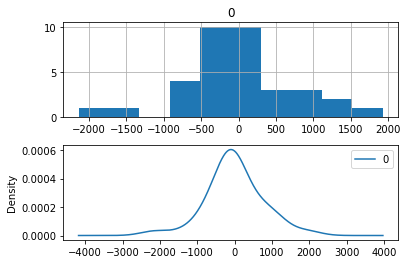

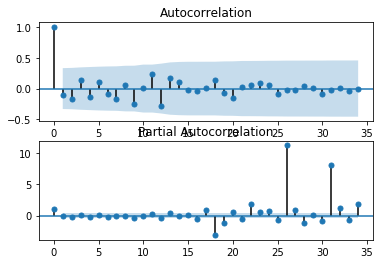

In [76]:
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = -111.150423+inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(residuals, ax=plt.gca())
plt.subplot(212)
plot_pacf(residuals, ax=plt.gca())
plt.show()

#### Note

We can see that the distribution has a right shift and that the mean is non-zero at 129.128258.

We could use this information to bias-correct predictions by adding the mean residual error of 129.128258 to each forecast made.

The example below performs this bias correlation.

In [77]:
from scipy.stats import boxcox
import numpy
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = -111.150423
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

#### Running the example creates two local files:

* model.pkl This is the ARIMAResult object from the call to ARIMA.fit(). This includes the coefficients and all other internal data returned when fitting the model.
* model_bias.npy This is the bias value stored as a one-row, one-column NumPy array.

In [78]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy

 
series = Series.from_csv('dataset.csv')
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 9728.771


>Predicted=9728.771, Expected=10803
>Predicted=11435.774, Expected=13916
>Predicted=4573.007, Expected=2639
>Predicted=3528.610, Expected=2899
>Predicted=4258.405, Expected=3370
>Predicted=3945.208, Expected=3740
>Predicted=4786.665, Expected=2927
>Predicted=4113.087, Expected=3986
>Predicted=3359.072, Expected=4217
>Predicted=1890.313, Expected=1738
>Predicted=5048.578, Expected=5221
>Predicted=6775.389, Expected=6424
RMSE: 1178.297


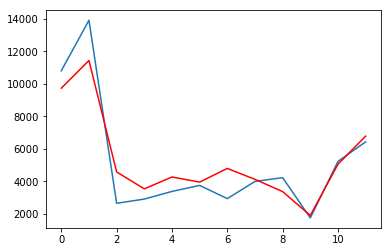

In [79]:
# load and prepare datasets
dataset = Series.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = Series.from_csv('validation.csv')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()